# Analyze NFL Stats with Python

## Setup and inspection 

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 1. Load the dataset

In [2]:
# load dataset
nfl = pd.read_csv('season_2021.csv')

# inspect first few rows
nfl.head()

,team_name,week,day,date,result,opponent,tm_score,opp_score,1stD_offense,TotYd_offense,PassY_offense,RushY_offense,TO_offense,1stD_defense,TotYd_defense,PassY_defense,RushY_defense,TO_defense
0,Arizona Cardinals,1,Sun,September 12,W,Tennessee Titans,38,13,22,416,280,136,1,17,248,162,86,3
1,Arizona Cardinals,2,Sun,September 19,W,Minnesota Vikings,34,33,21,474,371,103,2,22,419,242,177,0
2,Arizona Cardinals,3,Sun,September 26,W,Jacksonville Jaguars,31,19,23,407,316,91,1,20,361,202,159,4
3,Arizona Cardinals,4,Sun,October 3,W,Los Angeles Rams,37,20,27,465,249,216,0,24,401,280,121,2
4,Arizona Cardinals,5,Sun,October 10,W,San Francisco 49ers,17,10,20,304,210,94,1,19,338,186,152,1


### 2. Summarize outcomes

Next, we want to examine our outcome variable to find out how wins and losses are recorded. Check the counts of each value of the `result` variable.

In [3]:
# check result value counts
nfl.result.value_counts()

W    284
L    284
T      2
Name: result, dtype: int64

### 3. Encode the result labels

We have two problems with the `result` variable:
* The `T` group is very small, which can lead to issues with our model's performance.
* Our regression algorithm requires numeric values as the outcome, but ours is coded with letters.

We can solve both of these issues in one step! We'll group the tie with the losses and convert to 1 for wins and 0 for ties and losses.

Using the provided encoder, use the `.replace()` function to convert the `result` column values to numeric values. Then check the value counts again to make sure you have only two categories that are numbers rather than letters.

In [4]:
# nested dictionary to encode alphanumeric values to numeric values
result_encoder = {'result': {'W': 1, 'T': 0, 'L': 0}}

# encode result column using encoder
nfl.replace(result_encoder, inplace=True)

# check result value counts
nfl.result.value_counts()

0    286
1    284
Name: result, dtype: int64

### 4. Visualize the stats

Now let's take a moment to explore trends in the stats we will be using to predict wins. The variable `stat` has been set to `1stD_offense` by default. 

Use `sns.boxplot()` to create a box plot of `stat` by wins and losses. Set the `x`, `y`, and `data` parameters inside the function and save the plot as `stat_plot`.

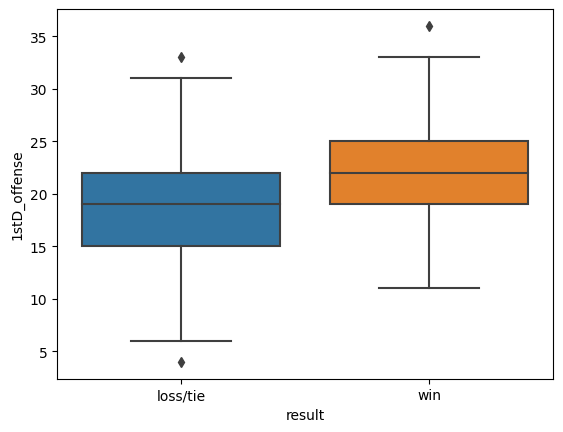

Index(['1stD_offense', 'TotYd_offense', 'PassY_offense', 'RushY_offense',
       'TO_offense', '1stD_defense', 'TotYd_defense', 'PassY_defense',
       'RushY_defense', 'TO_defense'],
      dtype='object')


In [5]:
# change stat to view plot
stat = '1stD_offense'

# box plot of stat
stat_plot = sns.boxplot(x="result", y=stat, data=nfl)

# plot labels
stat_plot.set_xticklabels(['loss/tie','win'])
plt.show()
# list feature names
print(nfl.columns[8:])

## Data Preparation

### 5. Standardize features

Before running our regression, we need to prepare our data by standardizing all the game stats. The provided code saves the game stats to a variable named `features` and saves the necessary scaling function as `scaler`.

Use the function `scaler.fit()` to fit `features` to the the scaling function. Then use `scaler.transform()` to standardize the game stats. Save this output as `X`.

In [6]:
# select feature variables to be scaled
features = nfl.iloc[:,8:]
scaler = StandardScaler()

# fit the transformer to the features
scaler.fit(features)

# transform and save as X
X = scaler.transform(features)

### 6. Save game outcomes

Let's also separate our game outcome variable for easier reference. Save the game outcomes as a variable called `y`.

In [7]:
# save result variable as y
y = nfl["result"]

### 7. Split into training and testing data

We need to randomly split the data into two groups:
* **training data:** we'll use this data to train our model to recognize winning games from patterns in the game stats.
* **testing data:** we'll use this data to check our model's accuracy.

Use the `train_test_split()` function imported from the `sklearn` library to split the data. This function will split up our features and result labels into training data and testing data, with `test_size` corresponding to the proportion of data reserved for testing. Set `test_size` to 0.5 and `random_state` to 42.

In [8]:
# create train-test split of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

## Analysis

### 8. Run the model

In this step, we'll train our model to use the patterns of the offensive and defensive stats to predict the probability of a winning game.

Create a `LogisticRegression()` classifier and save it to the variable `lrc`. Then call the `.fit()` function using the training data `X_train` and `y_train`.

In [9]:
# create the classifier
lrc = LogisticRegression()

# fit classifier to the training data
lrc.fit(X_train, y_train)

LogisticRegression()

### 9. Check model accuracy

With our classifier fitted (trained) to the training data, we can use the trained classifier to make predictions on the test data. Pass the test features `X_test` as a parameter  of `lrc.predict()` and save the resulting predictions as `y_pred`.

Now we can check the percentage of outcomes that our model predicted correctly. Use the `accuracy_score()` function imported from the `sklearn` library to compare our predicted test values `y_pred` to the true values `y_test`.

In [10]:
# predict with the classifier using the .predict() function
y_pred = lrc.predict(X_test)

# view the model accuracy with the accuracy_score() function
accuracy = accuracy_score(y_pred, y_test)
print(f"The model's accuracy on the test data is: {accuracy:.2f}")

The model's accuracy on the test data is: 0.83


### 10. Optimize by tuning hyperparameters

We can improve our model performance by closely studying how different paremeters affect performance. Let's consider two hyperparameters for the `LogisticRegression` classifer: `penalty` and `C`.

* `penalty` imposes a regularization penalty on the model for having too many variables. Our options generally are `l1` and `l2` regularization.
* `C` is the inverse of regularization strength. It is applying a penalty to increasing the magnitude of parameter values in order to reduce overfitting.

The following code runs a logistic regression on our same data and gets an accuracy score for each combination of `penalty` and `C`. Run the code to see how model accuracy changes when we use different values of these hyperparameters. If you'd like, try changing the values of `C` in the list.

In [11]:
# create a list of penalties
penalties = ['l1', 'l2']
# create a list of values for C
C = [0.01, 0.1, 1.0, 10.0, 1000.0]

for penalty in penalties:
    for c in C:

        # instantiate the classifier
        lrc_tuned = LogisticRegression(penalty=penalty, C=c, solver='liblinear')

        # fit the classifier to the training data
        lrc_tuned.fit(X_train, y_train)
        
        # predict with the classifier using the .predict() function
        y_pred = lrc_tuned.predict(X_test)

        # view the model accuracy with the accuracy_score() function
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_rd = round(accuracy*100,1)
        
        # print accuracy for each combination of penalty and C
        print(f'Accuracy: {accuracy_rd}% | penalty = {penalty}, C = {c}')

Accuracy: 52.3% | penalty = l1, C = 0.01
Accuracy: 84.6% | penalty = l1, C = 0.1
Accuracy: 83.2% | penalty = l1, C = 1.0
Accuracy: 82.5% | penalty = l1, C = 10.0
Accuracy: 82.5% | penalty = l1, C = 1000.0
Accuracy: 80.4% | penalty = l2, C = 0.01
Accuracy: 83.5% | penalty = l2, C = 0.1
Accuracy: 82.8% | penalty = l2, C = 1.0
Accuracy: 82.5% | penalty = l2, C = 10.0
Accuracy: 82.5% | penalty = l2, C = 1000.0


### 11. Optimize by changing test size

In the cell above, we see that sweeping our parameters did not yield much improvement in prediction accuracy. Let's try another method of parameter tuning: changing the test size of the train-test split. A list of test sizes between 0 and 1 has been coded for you. Similar to the last task, at each test size the code performs a train-test split, fits the model, and computes an accuracy score.

In [12]:
# optimal penalty and C
penalty = 'l1'
C = 0.1

# create a list of test_sizes
test_sizes = [val/100 for val in range(20,36)]

for test_size in test_sizes:

    # train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # instantiate the classifier
    lrc_tts = LogisticRegression(penalty = penalty, C = C, solver='liblinear')

    # fit the classifier to the training data
    lrc_tts.fit(X_train, y_train)

    # predict with the classifier using the .predict() function
    y_pred = lrc_tts.predict(X_test)

    # view the model accuracy with the accuracy_score() function
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_rd = round(accuracy*100,1)
    
    # print accuracy for each combination of penalty and test size
    print(f'Accuracy: {accuracy_rd}% | test size = {test_size}')

Accuracy: 87.7% | test size = 0.2
Accuracy: 87.5% | test size = 0.21
Accuracy: 87.3% | test size = 0.22
Accuracy: 87.9% | test size = 0.23
Accuracy: 88.3% | test size = 0.24
Accuracy: 88.8% | test size = 0.25
Accuracy: 87.9% | test size = 0.26
Accuracy: 88.3% | test size = 0.27
Accuracy: 88.1% | test size = 0.28
Accuracy: 88.6% | test size = 0.29
Accuracy: 87.1% | test size = 0.3
Accuracy: 87.6% | test size = 0.31
Accuracy: 86.9% | test size = 0.32
Accuracy: 87.3% | test size = 0.33
Accuracy: 86.1% | test size = 0.34
Accuracy: 86.0% | test size = 0.35


### 12. Save the optimized model

Now that we know which parameters optimize our model, let's run and save the final model with our choices for `test_size`, `penalty`, and `C`. Fill in the code to run and save the final model as `optLr`. Continue setting `random_state=42` for the split.

In [25]:
# set the test size and hyperparameters
test_size = 0.25
penalty = 'l1'
C = 0.1

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

# instantiate the classifier
optLr = LogisticRegression(penalty = penalty, C = C, solver='liblinear')

# fit the classifier to the training data
optLr.fit(X_train, y_train)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

### 13. Examine feature importance

Let's find out which stats were most important to our model predicting wins. The absolute values of the model coefficients has been saved for you as `importance`. We'll print and plot these scores to see which stat has the highest score.

Add code to create a bar plot of the feature importances.

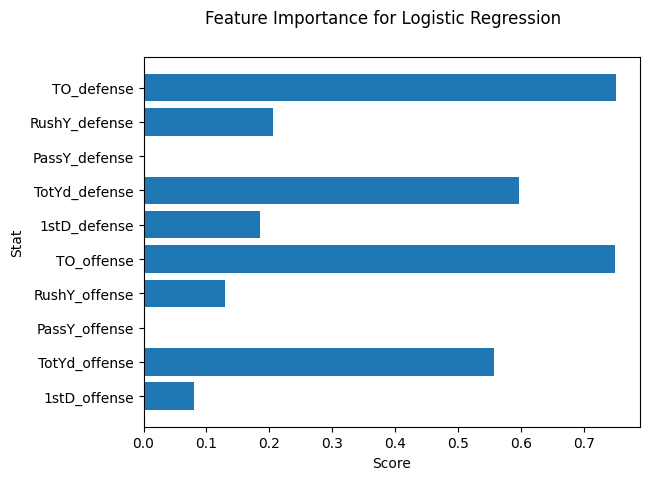

Feature: 1stD_offense, Score: 0.08
Feature: TotYd_offense, Score: 0.56
Feature: PassY_offense, Score: 0.0
Feature: RushY_offense, Score: 0.13
Feature: TO_offense, Score: 0.75
Feature: 1stD_defense, Score: 0.19
Feature: TotYd_defense, Score: 0.6
Feature: PassY_defense, Score: 0.0
Feature: RushY_defense, Score: 0.21
Feature: TO_defense, Score: 0.75


In [18]:
# get importance
importance = abs(optLr.coef_[0])

# visualize feature importance
plt.barh(features.columns, importance)

# add labels and titles
plt.suptitle('Feature Importance for Logistic Regression')
plt.xlabel('Score')
plt.ylabel('Stat')
plt.show()


# summarize feature importance
for i,v in enumerate(importance.round(2)):
    print(f'Feature: {features.columns[i]}, Score: {v}')

## Conclusion

### 13. Try your model on new data

In [19]:
# set team abbreviation (in capitals) and year
team = 'Dallas Cowboys'
year = 2022

# use helper function to pull new data
from helper import get_new_data
new_data = get_new_data(team=team, year=year)

# view head of new data
new_data.head()

,team_name,week,day,date,result,opponent,tm_score,opp_score,1stD_offense,TotYd_offense,PassY_offense,RushY_offense,TO_offense,1stD_defense,TotYd_defense,PassY_defense,RushY_defense,TO_defense
0,Dallas Cowboys,1,Sun,September 11,0,Tampa Bay Buccaneers,3,19,12,244,173,71,1,18,347,195,152,1
1,Dallas Cowboys,2,Sun,September 18,1,Cincinnati Bengals,20,17,19,337,230,107,1,19,254,165,89,0
2,Dallas Cowboys,3,Mon,September 26,1,New York Giants,23,16,23,391,215,176,0,22,336,169,167,1
3,Dallas Cowboys,4,Sun,October 2,1,Washington Commanders,25,10,15,279,217,62,0,17,297,155,142,2
4,Dallas Cowboys,5,Sun,October 9,1,Los Angeles Rams,22,10,10,239,76,163,0,14,323,285,38,3


<details>
    <summary style="display:list-item; font-size:16px;"><i>Need to check the team names? Toggle for code to print a list!</i></summary>

Copy and paste this code into a new code cell to get a list of team names.

```py
list(nfl.team_name.unique())
```

</details>

Before we can run the data in our model and get predictions, we need to standardize the stats using the same `scaler` we used for our original dataset.

In [20]:
# select just the game stats
new_X = new_data.loc[:,features.columns]

# standardize using original data's scaling
new_X_sc = scaler.transform(new_X)

Now we can use our model to make predictions and get an accuracy score for how well our model predicted wins with the new data.

In [21]:
# get new predictions
new_preds = optLr.predict(new_X_sc)

# get actual results and set type to float
new_results = new_data['result'].astype(float)

# get accuracy score for new data
acc_score = accuracy_score(new_results, new_preds)

Let's put all this information together in a table and print out our accuracy score.

In [22]:
# select only game data
col_names = ['day', 'date', 'result', 'opponent', 'tm_score', 'opp_score']
game_data = new_data.loc[:,col_names]
# create comparison table
comp_table = game_data.assign(predicted = new_preds,
                              actual = new_results.astype(int))

In [23]:
# print title and table
print(f'Predicted Wins vs Actual Wins for {team} in {year}')
comp_table

Predicted Wins vs Actual Wins for Dallas Cowboys in 2022


,day,date,result,opponent,tm_score,opp_score,predicted,actual
0,Sun,September 11,0,Tampa Bay Buccaneers,3,19,0,0
1,Sun,September 18,1,Cincinnati Bengals,20,17,1,1
2,Mon,September 26,1,New York Giants,23,16,1,1
3,Sun,October 2,1,Washington Commanders,25,10,1,1
4,Sun,October 9,1,Los Angeles Rams,22,10,1,1
5,Sun,October 16,0,Philadelphia Eagles,17,26,0,0
6,Sun,October 23,1,Detroit Lions,24,6,1,1
7,Sun,October 30,1,Chicago Bears,49,29,1,1
8,Sun,November 13,0,Green Bay Packers,28,31,0,0
9,Sun,November 20,1,Minnesota Vikings,40,3,1,1


In [24]:
# print accuracy
print(f'\nCurrent Accuracy Score: ' + str(round(acc_score*100,1)) + '%')


Current Accuracy Score: 89.5%
